<a href="https://colab.research.google.com/github/nisha1365/LLM_AI-Planet-Bootcamp/blob/main/Langchain_ChatwithWebpages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ChatBot like ChatGPT for multiple websites using Langchain

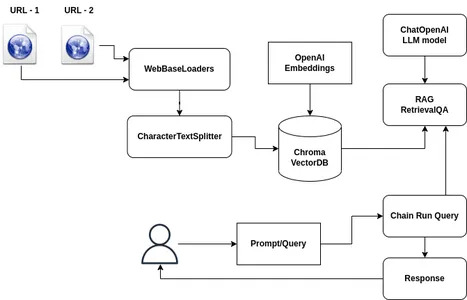

In [28]:
!pip install langchain openai

# Setup OpenAI API Key

platform.openai.com => View keys => Create a new secret key

In [29]:
import os
from getpass import getpass

In [4]:
os.environ['OPENAI_API_KEY'] = getpass("Enter you key:")

Enter you key:··········


# Add the data source

In [30]:
URLS = [
    'https://medium.com/@jaintarun7/getting-started-with-camicroscope-4e343429825d',
    'https://medium.com/@jaintarun7/multichannel-image-support-week2-92c17a918cd6',
    'https://medium.com/@jaintarun7/multi-channel-support-week3-2d220b27b22a',
    'https://www.health.harvard.edu/blog'
]

# Loaders- WebBaseLoader

In [31]:
from langchain.document_loaders import WebBaseLoader

In [32]:
loader = WebBaseLoader(URLS)

# Chunking- CharacterTextSplitter

In [33]:
from langchain.text_splitter import CharacterTextSplitter

In [34]:
data = loader.load()

In [35]:
text_splitter = CharacterTextSplitter(chunk_size=1000,chunk_overlap = 0)

In [36]:
website_data = text_splitter.split_documents(data)

tiktoken is an open-source byte pair encoding (BPE) tokenizer developed by OpenAI that is used for tokenizing text in their LLMs. It allows developers to count how many tokens are in a text before making calls to the OpenAI endpoint.

In [37]:
!pip install tiktoken

# Embeddings

In [38]:
from langchain.embeddings import OpenAIEmbeddings

In [39]:
embeddings = OpenAIEmbeddings()

# Vector Database

In [40]:
!pip install chromadb

In [41]:
from langchain.vectorstores import Chroma

In [42]:
vectordb = Chroma.from_documents(website_data,embeddings)

# Large language model - CHat_models from langchain

In [43]:
from langchain.chat_models import ChatOpenAI

In [44]:
llm = ChatOpenAI(model="gpt-3.5-turbo-16k",temperature=0.0)

# RetrievalQA

In [45]:
from langchain.chains import RetrievalQA

In [46]:
rag_chain = RetrievalQA.from_chain_type(llm=llm,chain_type="stuff",retriever=vectordb.as_retriever())

# Bring the user and tell him to write the prompt

In [47]:
prompt = "docker compose file for caMicroscope, give code" #query

In [48]:
response = rag_chain.run(prompt)

In [49]:
print(response)

Sure! Here is a sample Docker Compose file for caMicroscope:

```yaml
version: '3'
services:
  mongo:
    image: mongo:4.2-bionic
    container_name: ca-mongo
    volumes:
      - ./db:/data/db

  back:
    build:
      context: ../Caracal
      args:
        viewer: "develop"
        fork: "camicroscope"
    depends_on:
      - "mongo"
    ports:
      - "4010:4010"
    container_name: ca-back
    volumes:
      - ../caMicroscope:/src/camicroscope
      - ./config/login.html:/src/static/login.html
      - ./jwt_keys/:/src/keys/
      - ./config/routes.json:/src/routes.json
      - ./config/contentSecurityPolicy.json:/src/contentSecurityPolicy.json
    environment:
      JWK_URL: "https://www.googleapis.com/oauth2/v3/certs"
      IIP_PATH: "http://ca-iip:8080/fcgi-bin/iipsrv.fcgi"
      MONGO_URI: "mongodb://ca-mongo"
      DISABLE_SEC: "true"
      ALLOW_PUBLIC: "true"

  iip:
    image: camicroscope/iipimage:version-3.8.4
    container_name: ca-iip
    restart: unless-stopped
    vol

In [50]:
prompt = "what is Opill" #query

In [51]:
response = rag_chain.run(prompt)

In [52]:
print(response)

Opill is a new birth control pill that was recently approved by the FDA. It is expected to be available in early 2024.
